In [83]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


# Directory containing your CSV files
csv_dir = './benchmark_results/'

# List files in the directory
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]

# Read CSV files into a dictionary of DataFrames
dfs = {}
for file in csv_files:
    df_name = os.path.splitext(file)[0]  # Use file name as DataFrame name
    df = pd.read_csv(os.path.join(csv_dir, file))
    dfs[df_name] = df


for df in dfs.values():
    if 'VDD_TOTAL' in df.columns and 'VDD_SOC' in df.columns:
        df['VDD_OAKD'] = df['VDD_TOTAL'] - df['VDD_SOC']
# Example: Print first few rows of each DataFrame
# for name, df in dfs.items():
#     print(f"DataFrame: {name}")
#     print(df.head())
#     print()

# Example: Compare specific columns across DataFrames
# for name, df in dfs.items():
#     if 'frame' in df.columns and 'fps' in df.columns:
#         print(f"Stats for {name}:")
#         print(df[['frame', 'fps']].describe())
#         print()

# Further analysis and comparisons can be done as per your requirements


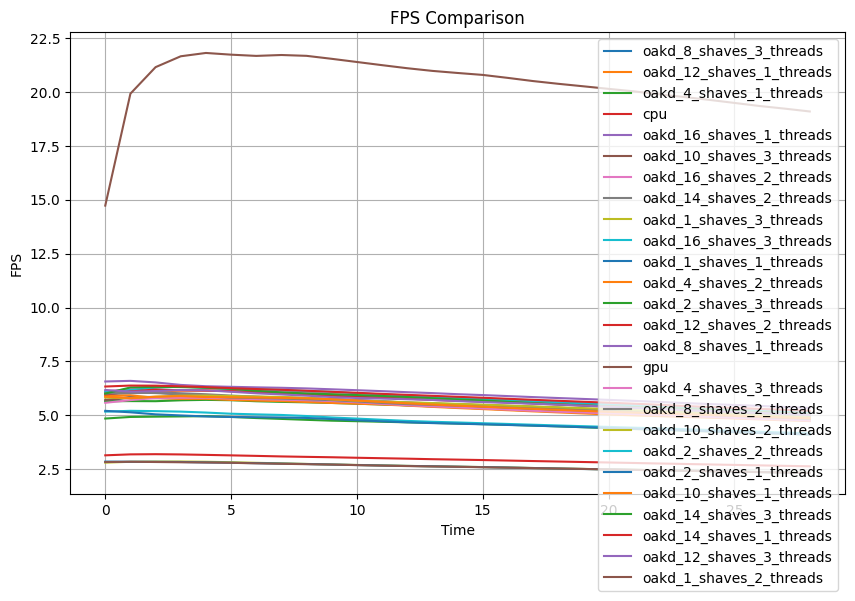

In [84]:
import matplotlib.pyplot as plt

# Plotting FPS for each file
plt.figure(figsize=(10, 6))
for name, df in dfs.items():
    if 'fps' in df.columns:
        # Extract label name without numbers up to and including the last underscore
        label_name = name.rsplit('_', 2)[0]  # Split at the last underscore and take the first part
        plt.plot(df['fps'], label=label_name)

plt.title('FPS Comparison')
plt.xlabel('Time')
plt.ylabel('FPS')
plt.legend()
plt.grid(True)
plt.show()


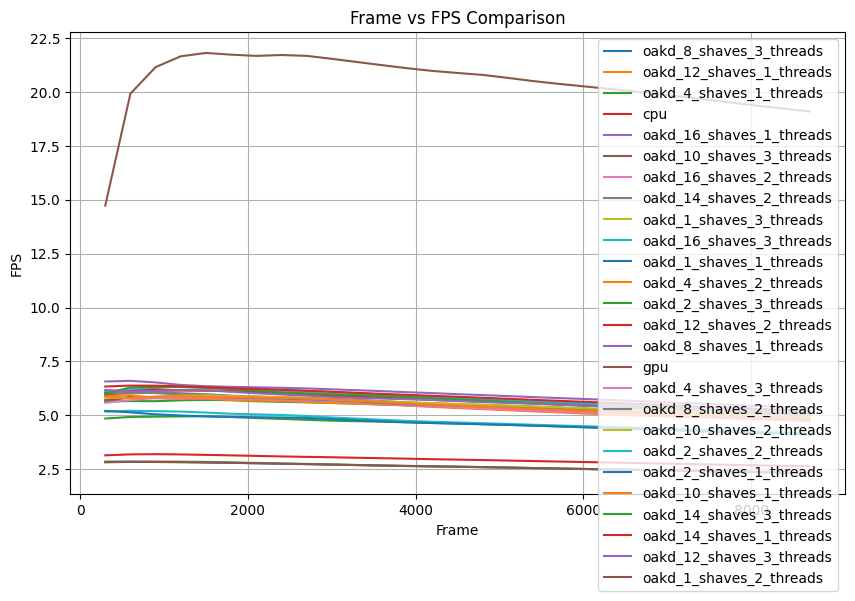

In [85]:

# colors = plt.cm.tab10(np.linspace(0, 1, len(dfs)))

# Plotting frame vs fps for each file with different colors
plt.figure(figsize=(10, 6))
for i, (name, df) in enumerate(dfs.items()):
    if 'frame' in df.columns and 'fps' in df.columns:
        plt.plot(df['frame'], df['fps'], label=name.rsplit('_', 2)[0])

plt.title('Frame vs FPS Comparison')
plt.xlabel('Frame')
plt.ylabel('FPS')
plt.legend()
plt.grid(True)
plt.show()


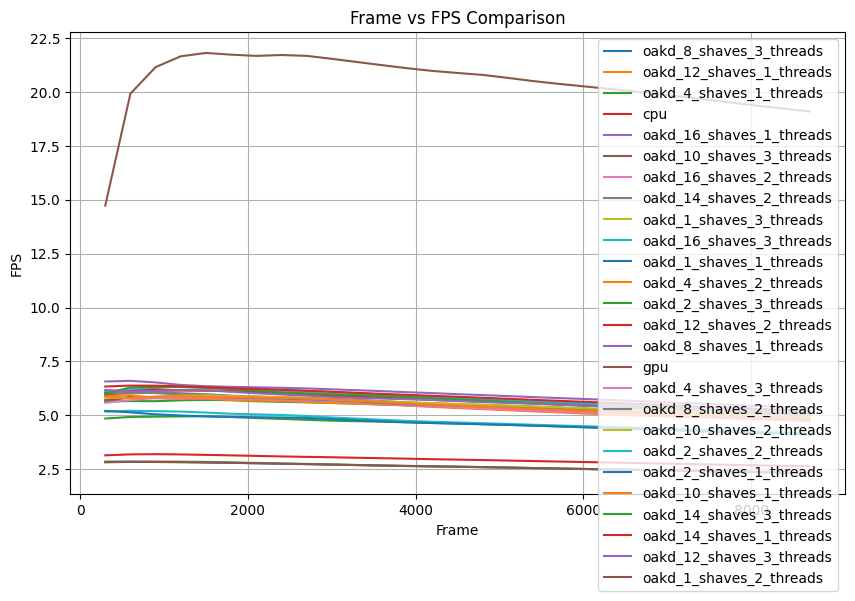

In [86]:

# colors = plt.cm.tab10(np.linspace(0, 1, len(dfs)))

# Plotting frame vs fps for each file with different colors
plt.figure(figsize=(10, 6))
for i, (name, df) in enumerate(dfs.items()):
    if 'frame' in df.columns and 'fps' in df.columns:
        plt.plot(df['frame'], df['fps'], label=name.rsplit('_', 2)[0])

plt.title('Frame vs FPS Comparison')
plt.xlabel('Frame')
plt.ylabel('FPS')
plt.legend()
plt.grid(True)
plt.show()


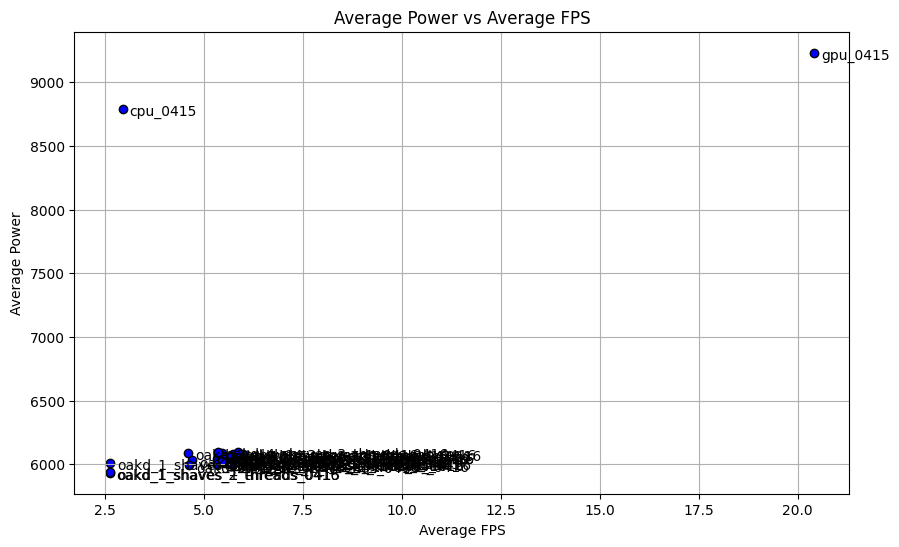

In [87]:

# Calculate average FPS and average power (VDD_TOTAL) for each CSV file
avg_fps = {}
avg_power = {}

for name, df in dfs.items():
    if 'fps' in df.columns and 'VDD_TOTAL' in df.columns:
        avg_fps[name] = df['fps'].mean()
        avg_power[name] = df['VDD_TOTAL'].mean()

# Convert dictionaries to DataFrame for easier plotting
avg_data = pd.DataFrame({'Average FPS': avg_fps, 'Average Power': avg_power})

# Plotting scatter plot of average FPS vs average power
plt.figure(figsize=(10, 6))
plt.scatter(avg_data['Average FPS'],avg_data['Average Power'], marker='o', c='blue', edgecolors='black')

# Adding labels and title
plt.title('Average Power vs Average FPS')
plt.xlabel('Average FPS')
plt.ylabel('Average Power')

# Adding data labels
for label, y, x in zip(avg_data.index, avg_data['Average Power'], avg_data['Average FPS']):
    plt.annotate(label.rsplit('_', 1)[0], (x, y), textcoords="offset points", xytext=(5,-5), ha='left')

plt.grid(True)
plt.show()


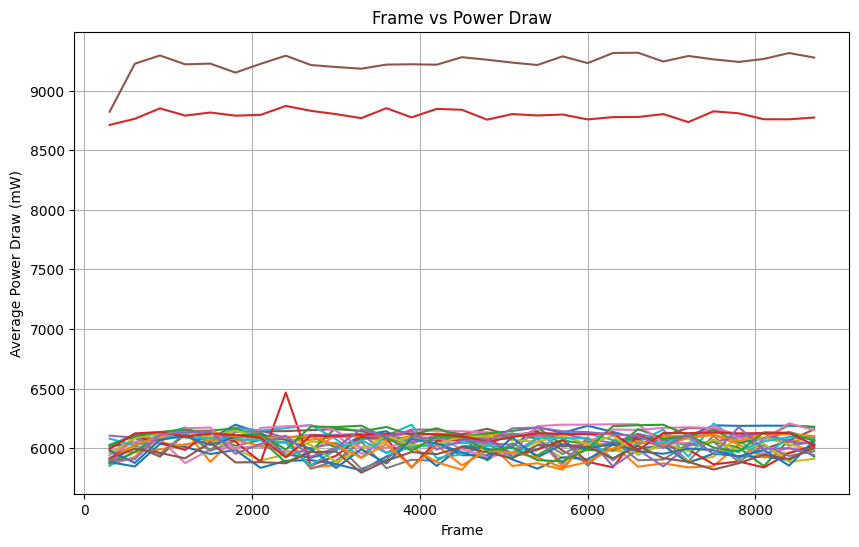

In [90]:
# Plotting frame vs VDD_OTHER
plt.figure(figsize=(10, 6))
for i, (name, df) in enumerate(dfs.items()):
    if 'frame' in df.columns and 'VDD_TOTAL' in df.columns:
        label = name.rsplit('_', 1)[0]
        plt.plot(df['frame'], df['VDD_TOTAL'], label=label)

plt.title('Frame vs Power Draw')
plt.xlabel('Frame')
plt.ylabel('Average Power Draw (mW)')
# plt.legend()
plt.grid(True)
plt.show()

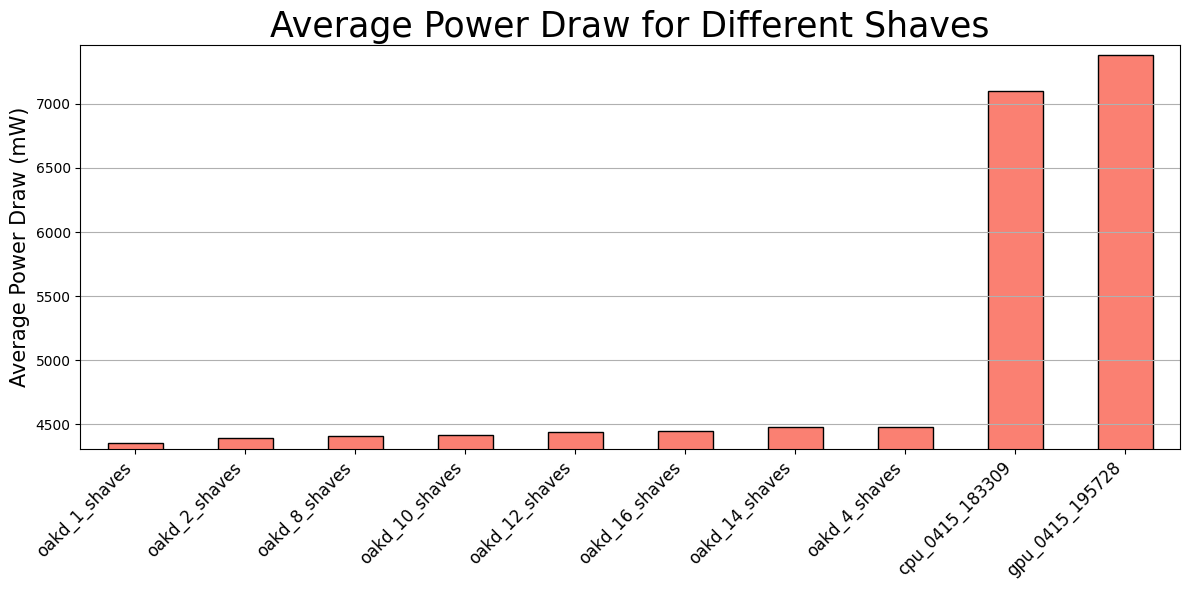

In [89]:
avg_other_power = {
    '_'.join(name.split('_')[:3]): df['VDD_OAKD'].mean()
    for name, df in dfs.items() if 'VDD_OAKD' in df.columns
}

# Convert to Series and sort
avg_other_series = pd.Series(avg_other_power).sort_values()
ymin = avg_other_series.min() * 0.99
ymax = avg_other_series.max() * 1.01

# Plot bar chart
plt.figure(figsize=(12, 6))
avg_other_series.plot(kind='bar', color='salmon', edgecolor='black')

plt.title('Average Power Draw for Different Shaves',fontsize=25)
plt.ylabel('Average Power Draw (mW)',fontsize=15)
plt.ylim(ymin, ymax)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.tight_layout()
plt.grid(axis='y')

plt.show()
